## XGBoost Model Training and Evaluation

### Imports and Setup

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [41]:
# Load data from dataset_generators/datasets
final_df_with_lags = pd.read_csv('../dataset_generators/datasets/final_1_lag_ffa_dataset.csv')

### Load 5-Fold Cross-Validation Data

In [ ]:
# Function to load the KFold = 5 normalized data
def load_kfold_data(fold):
    train = pd.read_csv(f'../dataset_generators/datasets/{fold}_train_normalized.csv')
    test = pd.read_csv(f'../dataset_generators/datasets/{fold}_test_normalized.csv')
    return train, test

### XGBoost Implementation

In [43]:
rmse_list = []
r2_list = []
mae_list = []

# Function to perform cross-validation and train XGBoost model
def cross_validate_model():
    for fold in range(5):
        train, test = load_kfold_data(fold)
        X_train = train.iloc[:, 12:].drop(columns=['fantasy_points'])
        y_train = train['fantasy_points']
        X_test = test.iloc[:, 12:].drop(columns=['fantasy_points'])
        y_test = test['fantasy_points']
        model = XGBRegressor()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print("Predictions:", y_pred)
        print("Root Mean Squared Error:", rmse)
        print("R^2 Score:", r2)
        print("Mean Absolute Error:", mae)
        rmse_list.append(rmse)
        r2_list.append(r2)
        mae_list.append(mae)

    print("\n")
    # Calculate mean of RMSE and R^2 Score across all folds
    mean_rmse = sum(rmse_list) / len(rmse_list) if rmse_list else 0
    mean_r2 = sum(r2_list) / len(r2_list) if r2_list else 0
    mean_mae = sum(mae_list) / len(mae_list) if mae_list else 0
    print("Mean RMSE across all folds:", mean_rmse)
    print("Mean R^2 Score across all folds:", mean_r2)
    print("Mean MAE across all folds:", mean_mae)
    
    return model, X_train, y_train, X_test, y_test

# cross_validate_model(final_df_with_lags)
model, X_train, y_train, X_test, y_test = cross_validate_model()

Predictions: [14.432499  14.398302  15.634148  ...  5.7235665  2.4916465  4.744634 ]
Root Mean Squared Error: 5.51908611989706
R^2 Score: 0.37556849188180197
Mean Absolute Error: 3.939845499360861
Predictions: [ 2.7380207  1.6930013 15.587633  ...  1.6771408  3.5145707  2.9934652]
Root Mean Squared Error: 5.551308208486176
R^2 Score: 0.3816489596866771
Mean Absolute Error: 3.9523036858947007
Predictions: [ 7.1982512 17.64335   21.833328  ...  3.1208594  5.761456   5.932411 ]
Root Mean Squared Error: 5.553367149547489
R^2 Score: 0.3829535909924936
Mean Absolute Error: 3.938173865096704
Predictions: [15.433167  18.964039  17.977028  ...  4.5862017  3.9194207  6.1811986]
Root Mean Squared Error: 5.4412446527423635
R^2 Score: 0.3797131236683109
Mean Absolute Error: 3.8760492743089077
Predictions: [ 5.0939455 14.276985  15.11718   ...  5.1676598  5.674536   7.3626633]
Root Mean Squared Error: 5.37034309921974
R^2 Score: 0.389664942100851
Mean Absolute Error: 3.816462579683565


Mean RMSE ac

<Figure size 1000x800 with 0 Axes>

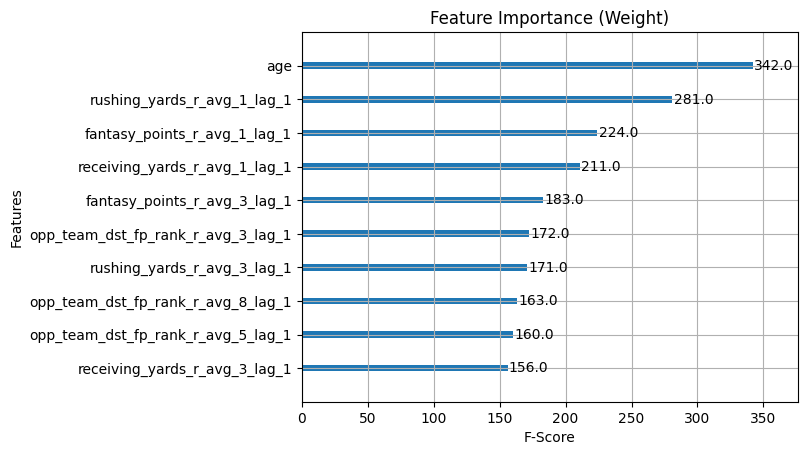

<Figure size 1000x800 with 0 Axes>

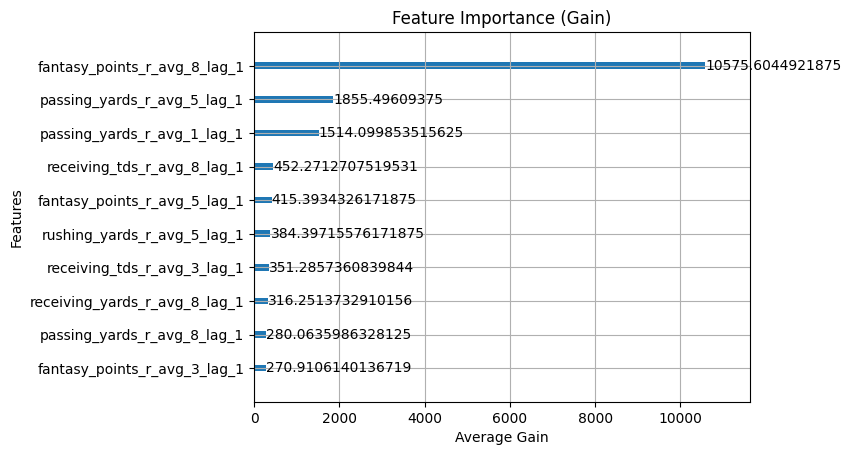

In [44]:
# Use the trained model to plot feature importance
import matplotlib.pyplot as plt
import xgboost as xgb

def plot_feature_importance(model, feature_names):
    feature_names = feature_names.tolist() if isinstance(feature_names, pd.Index) else feature_names
    model.get_booster().feature_names = feature_names
    plt.figure(figsize=(10, 8))
    xgb.plot_importance(model, importance_type='weight', max_num_features=10, xlabel='F-Score', )
    plt.title("Feature Importance (Weight)")
    plt.show()
    plt.figure(figsize=(10, 8))
    xgb.plot_importance(model, importance_type='gain', max_num_features=10, xlabel='Average Gain')
    plt.title("Feature Importance (Gain)")
    plt.show()

# Use the correct feature names for the model - remove 'Fantasy_points' from the list
plot_feature_importance(model, X_train.columns)

In [45]:
# Plot Correlation Heatmap
# import seaborn as sns

# def plot_correlation_heatmap(model, feature_names):
#     feature_names = feature_names.tolist() if isinstance(feature_names, pd.Index) else feature_names
#     model.get_booster().feature_names = feature_names
#     # Create a DataFrame from the feature names
#     X = final_df_with_lags[feature_names].copy()
#     y = final_df_with_lags['fantasy_points'].copy()
    
    
#     # scaler = MinMaxScaler()
#     # X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#     plt.figure(figsize=(12, 10))
#     corr = X.corr()
#     sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
#     plt.title("Feature Correlation Heatmap")
#     plt.show()

# X = final_df_with_lags.iloc[:, 11:-1]  # Features (all columns except first 11 and last column)
# # X = X.drop(columns=['fantasy_points'])  # Drop target variable
# plot_correlation_heatmap(X)

Learning Rate: 0.01, MAE: 4.162261096363354
Learning Rate: 0.02, MAE: 3.879302779403554
Learning Rate: 0.03, MAE: 3.802306526571324
Learning Rate: 0.04, MAE: 3.781911786142448
Learning Rate: 0.05, MAE: 3.7773316175859626
Learning Rate: 0.06, MAE: 3.7783995793806877
Learning Rate: 0.07, MAE: 3.7723673825771207
Learning Rate: 0.08, MAE: 3.7755478709322645
Learning Rate: 0.09, MAE: 3.769478253646175
Learning Rate: 0.1, MAE: 3.775765186352011


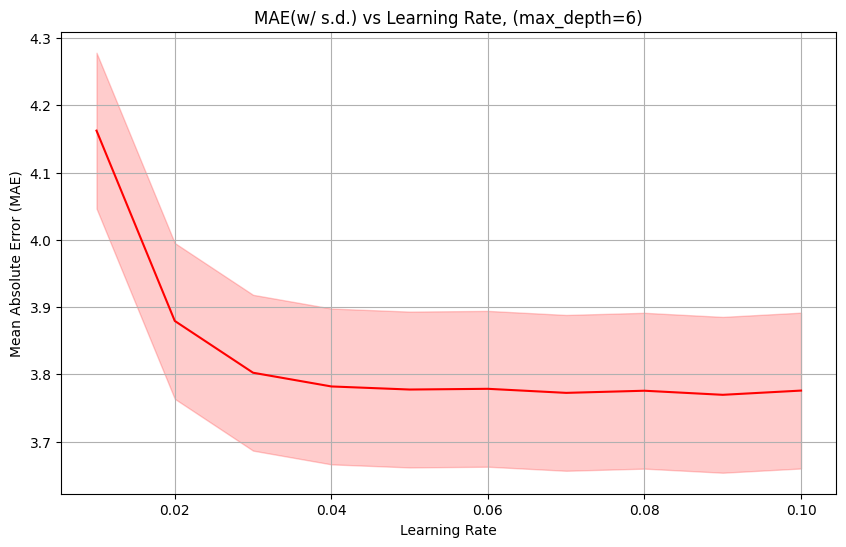

In [46]:
# Use the trained model to plot MAE against various learning rates with area of std deviation as shaded region
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
def plot_mae_vs_learning_rate(X_train, y_train, X_test, y_test, learning_rates):
    mae_values = []
    for lr in learning_rates:
        model = XGBRegressor(learning_rate=lr)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mae_values.append(mae)
        mae_values_std = np.std(mae_values)
        print(f"Learning Rate: {lr}, MAE: {mae}")

    plt.figure(figsize=(10, 6))
    plt.fill_between(learning_rates, np.array(mae_values) - mae_values_std, np.array(mae_values) + mae_values_std, alpha=0.2, color='r')
    plt.plot(learning_rates, mae_values, color='r')
    plt.xlabel('Learning Rate')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('MAE(w/ s.d.) vs Learning Rate, (max_depth=6)')
    plt.grid(True)
    plt.show()
    
plot_mae_vs_learning_rate(X_train, y_train, X_test, y_test, learning_rates)

Max Depth: 3, MAE: 4.221033607817826
Max Depth: 4, MAE: 4.191186800750005
Max Depth: 5, MAE: 4.171855647363118
Max Depth: 6, MAE: 4.162261096363354
Max Depth: 7, MAE: 4.154741597224483
Max Depth: 8, MAE: 4.151886511258845
Max Depth: 9, MAE: 4.150293828382628
Max Depth: 10, MAE: 4.152842632026362


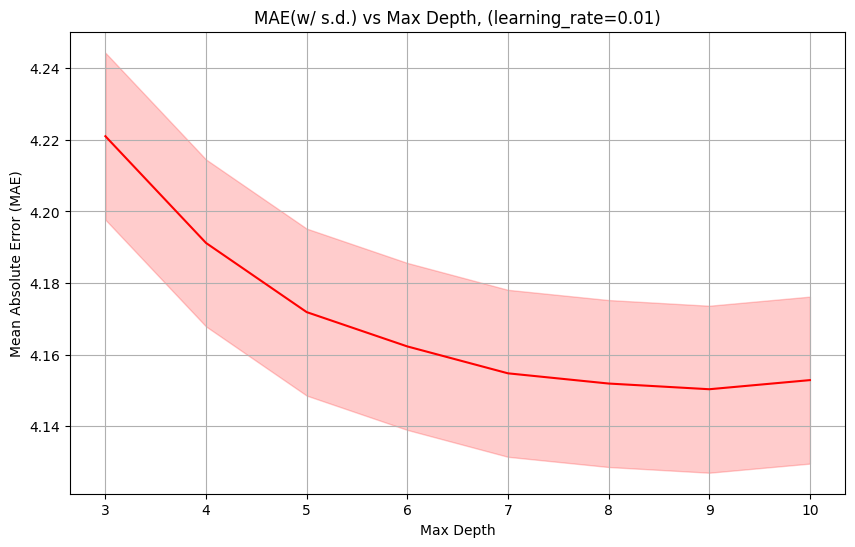

In [47]:
# Use the trained model to plot MAE against various max_depth with area of std deviation as shaded region
max_depths = [3, 4, 5, 6, 7, 8, 9, 10]
def plot_mae_vs_max_depth(X_train, y_train, X_test, y_test, max_depths):
    mae_values = []
    for md in max_depths:
        model = XGBRegressor(max_depth=md, learning_rate=0.01)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mae_values.append(mae)
        mae_values_std = np.std(mae_values)
        print(f"Max Depth: {md}, MAE: {mae}")

    plt.figure(figsize=(10, 6))
    plt.fill_between(max_depths, np.array(mae_values) - mae_values_std, np.array(mae_values) + mae_values_std, alpha=0.2, color='r')
    plt.plot(max_depths, mae_values, color='r')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('MAE(w/ s.d.) vs Max Depth, (learning_rate=0.01)')
    plt.grid(True)
    plt.show()

plot_mae_vs_max_depth(X_train, y_train, X_test, y_test, max_depths)

 98%|===================| 11919/12193 [00:39<00:00]        

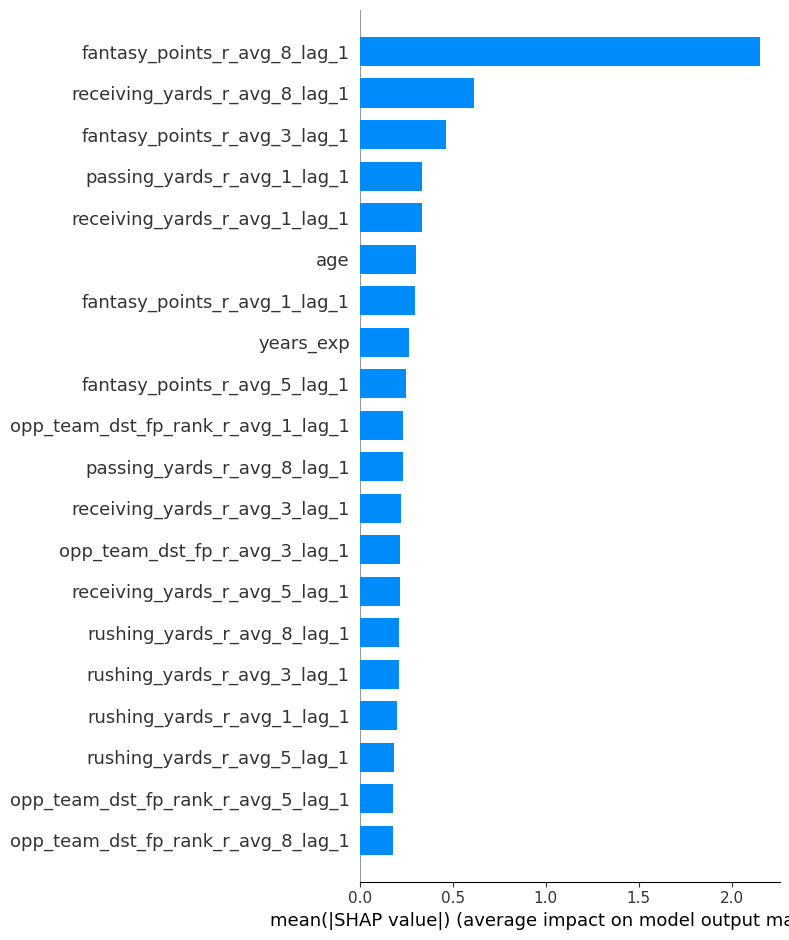

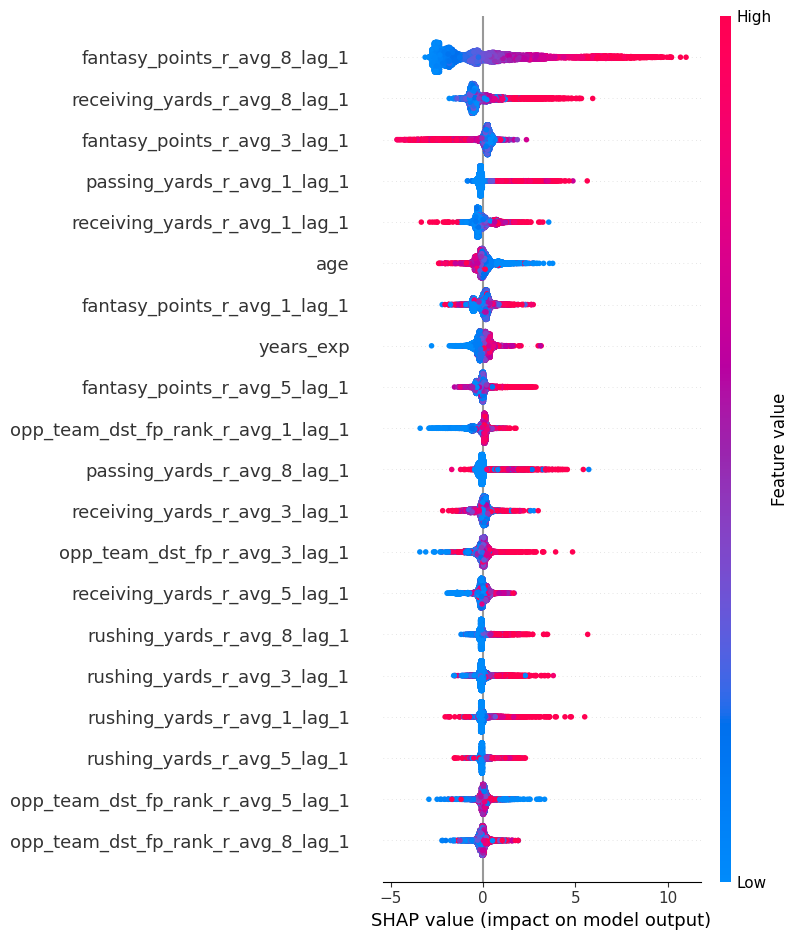

In [48]:
# Plot feature importance using SHAP values
import shap

def plot_shap_feature_importance(model, X_test):
    # Create a SHAP explainer
    explainer = shap.Explainer(model, X_test)
    
    # Calculate SHAP values
    shap_values = explainer(X_test)
    
    # Summary plot (bar and beeswarm)
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

plot_shap_feature_importance(model, X_test)

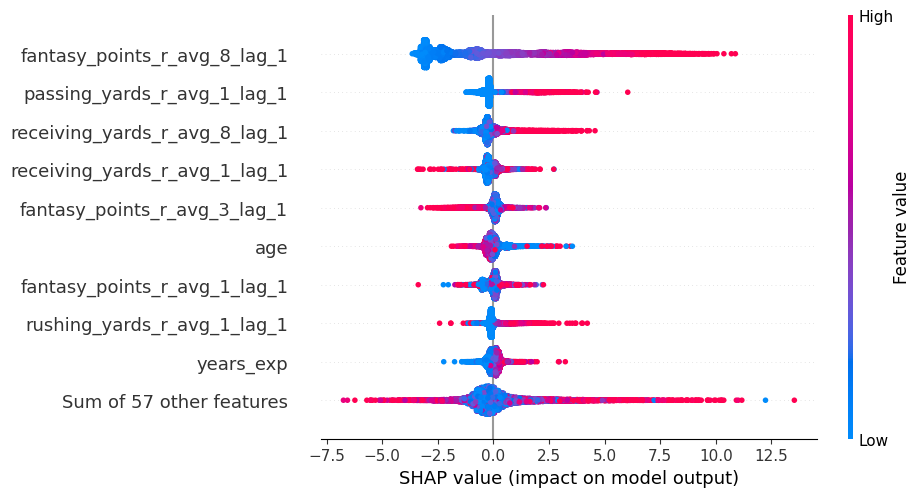

In [49]:
# Function to use SHAP to explain the machine learning model behavior with SHAP beeswarm plot
import shap

def plot_shap_beeswarm(X_test, model):
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)
    plt.figure(figsize=(10, 6))
    shap.plots.beeswarm(shap_values)

plot_shap_beeswarm(X_test, model)

In [50]:
# Function to use model to predict fantasy points for all weeks in final_df_with_lags, keeping 'player_id' for mapping back to player names later
def predict_fantasy_points(model, final_df_with_lags):
    """
    Predict fantasy points for each player's next game using the trained model.
    
    Args:
        model: Trained XGBoost model
        final_df_with_lags: DataFrame containing player stats with lagged features
        
    Returns:
        numpy.array: Predicted fantasy points for each player
    """
    final_df_with_lags = final_df_with_lags.copy()
    
    # Get features for prediction (exclude first 11 columns and target variable)
    X_ = final_df_with_lags.iloc[:, 11:].drop(columns=['fantasy_points'])
    
    # Scale features using MinMaxScaler fit only on prediction data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_)
    X_latest_scaled = X_scaled
    
    # Make predictions
    predicted_fantasy_points = model.predict(X_latest_scaled)
    
    final_df_with_lags['predicted_fantasy_points'] = predicted_fantasy_points

    return final_df_with_lags[['player_id', 'player_name', 'position_group', 'team', 'season', 'week', 'fantasy_points', 'predicted_fantasy_points']]

# Predict fantasy points for next week using the last trained model
predicted_fantasy_points = predict_fantasy_points(model, final_df_with_lags)
predicted_fantasy_points

,player_id,player_name,position_group,team,season,week,fantasy_points,predicted_fantasy_points
0,00-0007091,M.Hasselbeck,QB,IND,2014,4,-0.20,4.466771
1,00-0007091,M.Hasselbeck,QB,IND,2014,16,7.04,4.568129
2,00-0007091,M.Hasselbeck,QB,IND,2014,17,9.40,5.093946
3,00-0007091,M.Hasselbeck,QB,IND,2015,4,15.38,10.168969
4,00-0007091,M.Hasselbeck,QB,IND,2015,5,16.22,17.474791
...,...,...,...,...,...,...,...,...
60964,00-0039921,T.Benson,RB,ARI,2024,10,8.70,4.767205
60965,00-0039921,T.Benson,RB,ARI,2024,12,1.80,7.340744
60966,00-0039921,T.Benson,RB,ARI,2024,13,2.00,6.127885
60967,00-0039921,T.Benson,RB,ARI,2024,14,1.90,4.426887


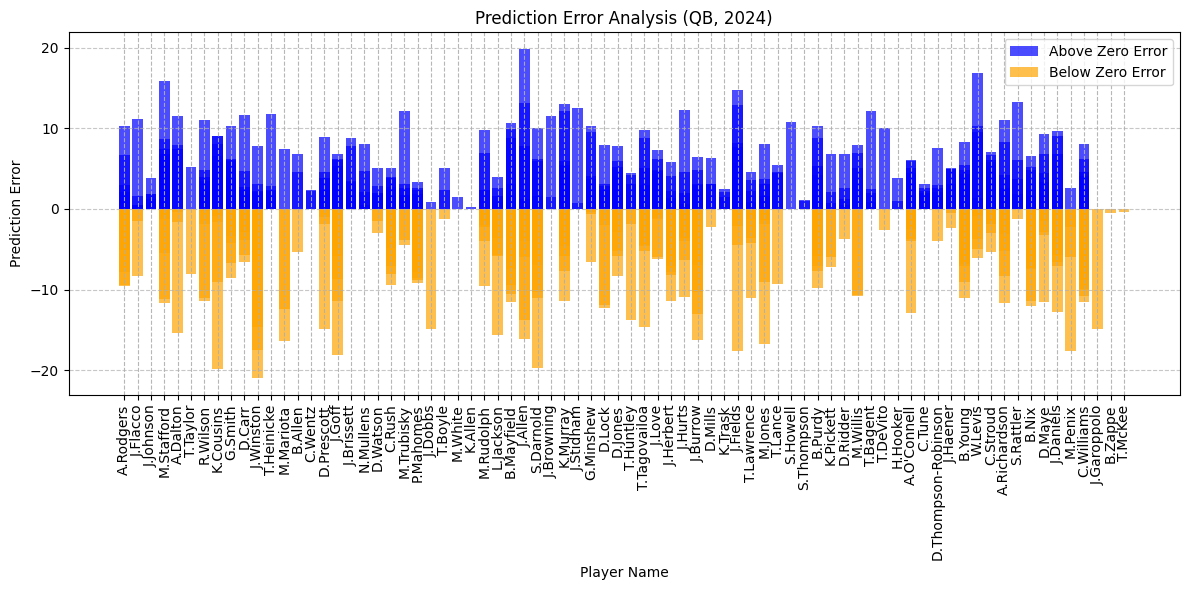

In [51]:
# Function for Prediction error analysis
def analyze_prediction_errors(predicted_fantasy_points):
    predicted_fantasy_points = predicted_fantasy_points.copy()
    # 2024 season only
    predicted_fantasy_points = predicted_fantasy_points[predicted_fantasy_points['season'] == 2024]
    # All QB position_group only
    predicted_fantasy_points = predicted_fantasy_points[predicted_fantasy_points['position_group'] == 'QB']
    predicted_fantasy_points['prediction_error'] = predicted_fantasy_points['predicted_fantasy_points'] - predicted_fantasy_points['fantasy_points']

    # Convert prediction_error to percent_error - not absolute
    predicted_fantasy_points['percent_error'] = (predicted_fantasy_points['prediction_error'] / predicted_fantasy_points['fantasy_points'])

    # Above and below zero errors
    above_zero = predicted_fantasy_points[predicted_fantasy_points['prediction_error'] >= 0]
    below_zero = predicted_fantasy_points[predicted_fantasy_points['prediction_error'] < 0]

    plt.figure(figsize=(12, 6))

    # Plot above 0 error chart with blue color and alpha 0.7
    plt.bar(above_zero['player_name'], above_zero['prediction_error'], color='blue', alpha=0.7, label='Above Zero Error')
    # Plot below 0 error chart with orange color and alpha 0.7
    plt.bar(below_zero['player_name'], below_zero['prediction_error'], color='orange', alpha=0.7, label='Below Zero Error')
    # All vertical grid lines throughout the plot
    plt.grid(axis='x', linestyle='--', alpha=0.9)
    # All horizontal grid lines throughout the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.xlabel('Player Name')
    plt.ylabel('Prediction Error')
    plt.title('Prediction Error Analysis (QB, 2024)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

analyze_prediction_errors(predicted_fantasy_points)


## 2025 Predictions

In [52]:
# Load player game-level stats for 2025 season to identify current rosters
# player_stats_2025 = nfl.load_player_stats(2025)
# player_stats_pandas_2025 = player_stats_2025.to_pandas()
# player_stats_pandas_2025 = player_stats_pandas_2025[player_stats_pandas_2025['season_type'] != 'POST']
# player_stats_pandas_2025

In [53]:
# Create Complete Team Defense Dataframes
# def create_team_defense_df(complete_data_df):
#     # Filter for defensive positions
#     defensive_positions = ['DL', 'LB', 'DB']
#     team_defense_df = complete_data_df[complete_data_df['pos_abb'].isin(defensive_positions)].copy()
    
#     return team_defense_df

# team_defense_df = create_team_defense_df(complete_data_df)
# team_defense_df.columns